In [72]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sympy import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit as sss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
import scipy

Considere el dataset de diagnóstico de cancer de mama de la Universidad de Wisconsin

In [3]:
%%bash
wget -nc -c https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
wget -nc -c https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

El fichero “wdbc.data” ya está ahí, no se recupera.

El fichero “wdbc.names” ya está ahí, no se recupera.



#### Lea el *readme* y describa el dataset en términos cualitativos 



In [4]:
%%bash
cat wdbc.names

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

Es un recopilación de datos nucleares para el diagnostico de cancer de mamas.

Tiene 569 instancias y 32 atributos cada una.

#### Importe el dataset usando `numpy` o `pandas`

In [5]:
col_names = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
            'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
            'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
            'concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
             'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
            'concave points_worst','symmetry_worst','fractal_dimension_worst']
df = pd.read_csv("wdbc.data", header=None, names = col_names)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Caracterice estadísticamente cada uno de los atributos
1. Calcule la media, varianza, simetría y curtosis para cada atributo usando (a) todos los datos y (b) por separado para tumores benignos y malignos. Explique el significado de los valores obtenidos. ¿Cuales atributos se acomodan a una normal?
1. Visualice la distribución empírica de cada atributo con `matplotlib` usando (a) todos los datos y (b) por separado para tumores benignos y malignos. ¿Qué tipo de distribución sería apropiada para ajustar cada atributo? ¿Puede diferenciar el tipo de tumor usando los atributos de forma aislada?

Para todos los datos:

In [7]:
df_muestras_all = df.drop(['id'], axis=1)
mean_all = df_muestras_all.mean()
var_all = df_muestras_all.var()
sym_all = df_muestras_all.skew()
kurt_all = df_muestras_all.kurtosis()

Para los tumores benignos:

In [8]:
df_muestras_B = df_muestras_all[df_muestras_all.diagnosis == 'B']
mean_B = df_muestras_B.mean()
var_B = df_muestras_B.var()
sym_B = df_muestras_B.skew()
kurt_B = df_muestras_B.kurtosis()

In [9]:
print(mean_B, var_B, sym_B, kurt_B)

radius_mean                 12.146524
texture_mean                17.914762
perimeter_mean              78.075406
area_mean                  462.790196
smoothness_mean              0.092478
compactness_mean             0.080085
concavity_mean               0.046058
concave points_mean          0.025717
symmetry_mean                0.174186
fractal_dimension_mean       0.062867
radius_se                    0.284082
texture_se                   1.220380
perimeter_se                 2.000321
area_se                     21.135148
smoothness_se                0.007196
compactness_se               0.021438
concavity_se                 0.025997
concave points_se            0.009858
symmetry_se                  0.020584
fractal_dimension_se         0.003636
radius_worst                13.379801
texture_worst               23.515070
perimeter_worst             87.005938
area_worst                 558.899440
smoothness_worst             0.124959
compactness_worst            0.182673
concavity_wo

Para los tumores malignos:

In [10]:
df_muestras_M = df_muestras_all[df_muestras_all.diagnosis == 'M']
mean_M = df_muestras_M.mean()
var_M = df_muestras_M.var()
sym_M = df_muestras_M.skew()
kurt_M = df_muestras_M.kurtosis()

In [11]:
print(mean_M, var_M, sym_M, kurt_M)

radius_mean                  17.462830
texture_mean                 21.604906
perimeter_mean              115.365377
area_mean                   978.376415
smoothness_mean               0.102898
compactness_mean              0.145188
concavity_mean                0.160775
concave points_mean           0.087990
symmetry_mean                 0.192909
fractal_dimension_mean        0.062680
radius_se                     0.609083
texture_se                    1.210915
perimeter_se                  4.323929
area_se                      72.672406
smoothness_se                 0.006780
compactness_se                0.032281
concavity_se                  0.041824
concave points_se             0.015060
symmetry_se                   0.020472
fractal_dimension_se          0.004062
radius_worst                 21.134811
texture_worst                29.318208
perimeter_worst             141.370330
area_worst                 1422.286321
smoothness_worst              0.144845
compactness_worst        

#### Búsqueda de correlaciones

1. Construya una matriz de *scatter plots* usando `matplotlib` o [`pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-matrix-plot) entre todos los pares de atributos. Use un color distinto para los tumores malignos y los benignos.  
1. Use un modelo de recta (dos parámetros) y ajustelo a cada par de atributos distintos. Muestre la recta obtenida en cada uno de los *scatter plots*. Añada una caja de texto con el valor del estadístico $r$. 
1. ¿Cuáles pares de variables están más correlacionadas? Justifique ¿Cuáles pares de variables separan mejor los tipos de tumor?

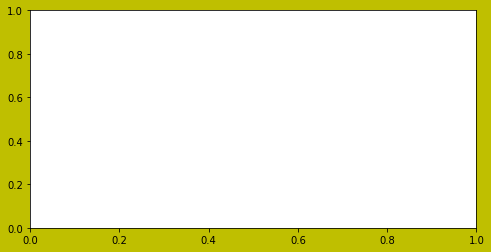

In [12]:
colX=["radius_mean", "texture_mean", "perimeter_mean","area_mean","smoothness_mean","compactness_mean",
     "concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]
colY=["texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean",
      "concave points_mean","symmetry_mean","fractal_dimension_mean"]

def quitar(change):
    nueCol=colX.copy()
    nueCol.remove(change['new'])
    boxY .options=nueCol
    
def graficar(b):
    x,y=boxX.value,boxY.value
    ax1.cla()
    for i in ['B', 'M']:
        aux=df.loc[df["diagnosis"]==i]
        ax1.scatter(x=aux[x].values, y=aux[y].values,marker=None, s=None, c=None,label=i, alpha=1.)  
    ax1.set_xlabel(x, fontsize=15)
    ax1.set_ylabel(y, fontsize=15)
    ax1.legend()
    
push = widgets.Button(description='Graficar')
    
slider_style = {'description_width': 'initial'}
boxX = widgets.Dropdown(description='X',options=colX,style=slider_style)
boxY = widgets.Dropdown(description='Y',options=colY,style=slider_style)


fig, ax1 = plt.subplots(figsize=(8, 4), facecolor='y')    

push.on_click(graficar)
BOX=widgets.HBox([boxX,boxY, push])
BO2=widgets.HBox([boxX,boxY, push])
display(BOX)
boxX.observe(quitar, names='value')

#### Regresión logística: Teórico

Sea un problema de clasificación de $M$ observaciones $\{\vec x_i, y_i\}$ donde $\vec x_i \in \mathbb{R}^D$ (D atributos) y $y_i \in \{0, 1\}$ (clasificación binaria)

Se propone el siguiente modelo con $D+1$ parámetros

$$
y_i = \mathcal{S} \left(\theta_0 + \sum_{j=1}^D \theta_j x_{ij}\right),
$$

donde $\mathcal{S}(z) = \frac{1}{1+\exp(-z)}$

> Asuma que las observaciones son iid y que $y_i$ se  distribuye Bernoulli 

La salida de este clasificador es un valor en $[0, 1]$. Para tomar un decisión binaria se debe seleccionar un umbral $\mathcal{T}$ tal que

$$
d_i = 
\begin{cases} 
\text{maligno} (0), & \text{si } p(y_i|\theta, \vec x_i) < \mathcal{T} \\ 
\text{benigno} (1), & \text{si } p(y_i|\theta, \vec x_i) \geq \mathcal{T}
\end{cases}
$$

Una vez seleccionado el umbral se puede contar la cantidad de 
- True positives (TP): Tumores benignos clasificados como benignos
- True negative (TN): Tumores malignos clasificados como malignos
- False positives (FP): Tumores malignos clasificados como benignos
- False negative (FN): Tumores  benignos clasificados como malignos

Estas métricas son la base para construir una "tabla de confusión" para el clasificador

|Clasificado como/En realidad era|Positivo|Negativo|
|---|---|---|
|Positivo:|TP | FP |
|Negativo:| FN | TN |

Actividades:
1. Obtenga una expresión simplificada para la función de costo: máximo logaritmo de la verosimilitud 
1. Obtenga una expresión simplificada para el gradiente de la función de costo con respecto a $\theta$
1. Investigue sobre las métricas para clasificación binaria: *precision*, *recall*, *f1* y *accuracy*. Explique cada una y discuta sobre las ventajas de usar el puntaje f1 en lugar del *accuracy* de un clasificador para evaluar su desempeño

Hints
- $d\mathcal{S}(z)/d\theta = \mathcal{S}(z)(1-\mathcal{S}(z))$
- $\log(1 - \mathcal{S}(z)) = \log \mathcal{S}(z) -z$ 

###### Función de costo:
$$
J(\theta)=\frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
$$

$$
=> \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})(log(h_\theta(x^{(i)}))-\theta)]
$$

###### Gradiente de la función de costo:
$$
\frac{\delta J(\theta)}{\delta \theta_j}=\frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

$$
=> J(\theta_j)(1-J(\theta_j))
$$

TP: True Positive,
TN: True Negative,
FP: False Positive,
FN: False Negative,


accuracy: Es la proporcion de instancias acertadas respecto al total .Es la métrica más explicita, suele ser la primera en calcularse. 

precision: La precision es la proporcion de datos que fueron acertados correctamente del total de predicciones que se dijeron positivas TP/(TP+FP).

recall: Recall es la proporcion de datos que fue acertado con respecto al total de datos reales positivos  TP/(TP+FN).

f1: Es una métrica que considera la precision y el recall, suele usarse para comprobar con un número único cuan bueno es el modelo 2(Precision * Recall)/(Precision + Recall).

Accuracy Vs f1:

Accuracy tiende a ser la más errada ya que no representa correctamente el funcionamiento de un modelo si los datos están desbalanceados, por ejemplo, si un modelo resulta tener un 99% de acertividad no quiere decir que sea bueno, puede significar que muchos de los datos pertenecen a una misma clase, y esto hará que no se haga buena predicción de ese 1% restante. 

Por otro lado, f1 es una métrica que resume el modelo en un único valor que considera precision y recall, pero sin embargo, siempre deberia ser corroborado por estas dos mediciones por separado. 

#### Regresión logística: Práctico

1. Implemente en Python la función de costo y su gradiente para el problema de clasificación de tumores
1. Divida el conjunto de datos en subconjuntos de entrenamiento y prueba seleccionados aleatoriamente pero manteniendo la distribución de las clases (puede usar [`sklearn.model_selection.StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit))
1. Entrene un regresor logístico usando `scipy.optimize`. Seleccione un método de optimización justificando su decisión. Calibre el método seleccionado. Seleccione el modelo que minimiza el error de prueba.
1. Seleccione el umbral $\mathcal{T}$ que maximice el puntaje f1 y muestre la tabla de confusión obtenida en el conjunto de prueba (puede usar las funciones de [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics))
1. Proponga e implemente una metodología para cuantificar la incerteza de su clasificador

Recomendaciones
- Estandarize los atributos antes de entrenar el predictor 
- Cuide de no evaluar $\log(0)$
- [`np.logaddexp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logaddexp.html)


In [62]:
# Variable objetivo
Y = df_muestras_all[["diagnosis"]]
# Variables predictivas (o explicativas)
X = df_muestras_all[["radius_mean", "texture_mean", "perimeter_mean","area_mean",
                    "smoothness_mean","compactness_mean","concavity_mean","concave points_mean",
                    "symmetry_mean","fractal_dimension_mean"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .8, random_state=25)

#### regresion logistica:

In [65]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/home/fabian/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fabian/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[-2.57433648  0.22273077  0.17975446  0.02492287  0.0982928   0.45978288
   0.69696313  0.31691543  0.18143409  0.01969028]]
intercept: [-0.45436673]


In [67]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M

In [68]:
#Evaluación del rendimiento del clasificador
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[264,  25],
       [ 20, 147]])

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.91      0.92       289
           M       0.85      0.88      0.87       167

   micro avg       0.90      0.90      0.90       456
   macro avg       0.89      0.90      0.89       456
weighted avg       0.90      0.90      0.90       456



con esto obtenemos un entrenamiento relativamente bueno, ya que la precision, recall y f1 son altos.